In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
color = sns.color_palette()

from sklearn.preprocessing import LabelEncoder

import os
import gc

In [ ]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip3 install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!python3.10 -m pip install --upgrade pip

/bin/bash: python3.10: command not found


In [ ]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip


Usage:   
  pip <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  cache                       Inspect and manage pip's wheel cache.
  wheel                       Build wheels from your requirements.
  hash                        Compute hashes of package archives.
  completion                  A helper command used for command completion.
  debug                       Show information useful for debugging.
  help                        Show help 

In [ ]:
application_train = pd.read_csv('application_data.csv')

application_train = application_train
temp_final = application_train

In [ ]:
application_train.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
application_train.shape

(50000, 123)

In [ ]:
application_train.dtypes.value_counts()

float64    65
int64      42
object     16
dtype: int64

In [ ]:
# Number of unique classes in each object column
application_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [ ]:
application_train.isnull().mean().sort_values(ascending = False)

COMMONAREA_AVG              0.71588
COMMONAREA_MODE             0.71588
COMMONAREA_MEDI             0.71588
NONLIVINGAPARTMENTS_MODE    0.71110
NONLIVINGAPARTMENTS_MEDI    0.71110
                             ...   
NAME_FAMILY_STATUS          0.00000
NAME_EDUCATION_TYPE         0.00000
NAME_INCOME_TYPE            0.00000
AMT_ANNUITY                 0.00000
Unnamed: 0                  0.00000
Length: 123, dtype: float64

In [ ]:
Null_columns = pd.DataFrame(application_train.isnull().mean())
Null_columns.reset_index(inplace=True)
Null_columns.columns=['columns','corr']
# Null_columns = Null_columns[Null_columns['0']<.5]
Null_columns = Null_columns[Null_columns['corr']<0.5]
columns_final = Null_columns['columns']

In [ ]:
application_train = application_train[columns_final]
application_train

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,259134,399886,1,Cash loans,F,Y,Y,0,72000.0,334152.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
49996,259140,399892,1,Cash loans,F,N,Y,0,126000.0,393543.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
49997,259142,399894,1,Cash loans,M,Y,Y,0,157500.0,545040.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
49998,259148,399900,1,Cash loans,F,Y,Y,0,112500.0,123637.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0


In [ ]:
for col in application_train.columns:
    if(application_train[col].dtype=='int64' or application_train[col].dtype=='float64'):
        application_train[col].fillna(application_train[col].mean(), inplace = True)

application_train['EXT_SOURCE_1']=temp_final['EXT_SOURCE_1']

<ipython-input-15-608f89c312d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  application_train[col].fillna(application_train[col].mean(), inplace = True)
<ipython-input-15-608f89c312d9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  application_train['EXT_SOURCE_1']=temp_final['EXT_SOURCE_1']


### Distribution of target

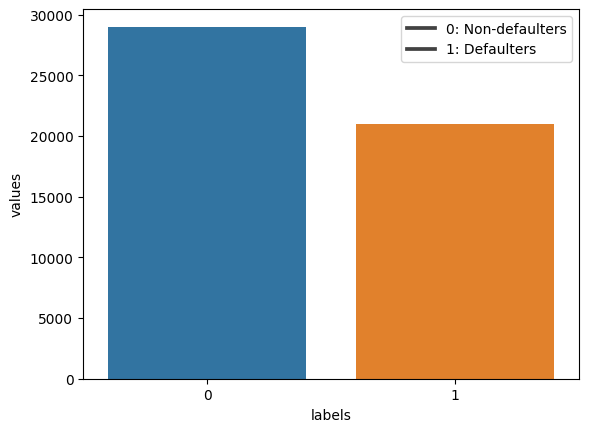

In [ ]:
#temp = pd.DataFrame({'labels': application_train["TARGET"].value_counts().index,
 #                  'values': application_train["TARGET"].value_counts().values})

#sns.barplot(x = 'labels',y = 'values',data = temp)
#plt.show()
#with legend

temp = pd.DataFrame({'labels': application_train["TARGET"].value_counts().index,
                   'values': application_train["TARGET"].value_counts().values})

sns.barplot(x = 'labels',y = 'values',data = temp)
plt.legend(['0: Non-defaulters', '1: Defaulters'])
plt.show()




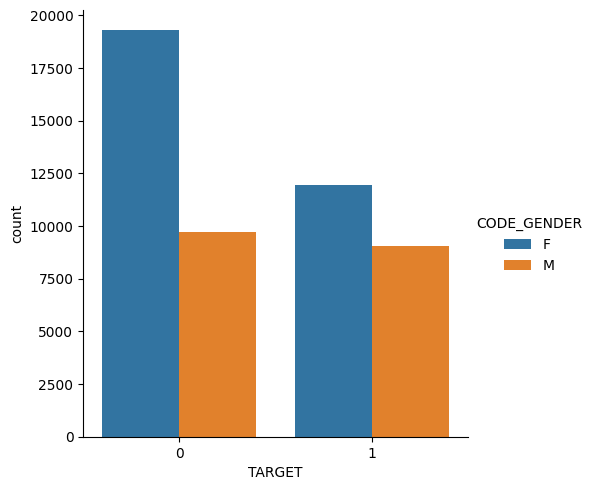

In [ ]:
sns.catplot(x = 'TARGET',hue="CODE_GENDER", kind="count", data=application_train)

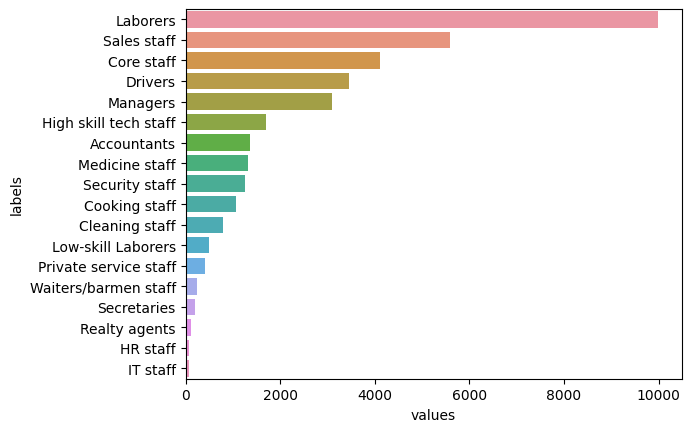

In [ ]:
temp = pd.DataFrame({'labels': application_train["OCCUPATION_TYPE"].value_counts().index,
                     'values': application_train["OCCUPATION_TYPE"].value_counts().values})
sns.barplot(y = 'labels', x='values',data = temp)
plt.show()

In [ ]:
# temp_occupation = pd.DataFrame(application_train.groupby(by=['OCCUPATION_TYPE','TARGET'])[''].count())
application_train['OCCUPATION_TYPE'].value_counts()> 1500

Laborers                  True
Sales staff               True
Core staff                True
Drivers                   True
Managers                  True
High skill tech staff     True
Accountants              False
Medicine staff           False
Security staff           False
Cooking staff            False
Cleaning staff           False
Low-skill Laborers       False
Private service staff    False
Waiters/barmen staff     False
Secretaries              False
Realty agents            False
HR staff                 False
IT staff                 False
Name: OCCUPATION_TYPE, dtype: bool

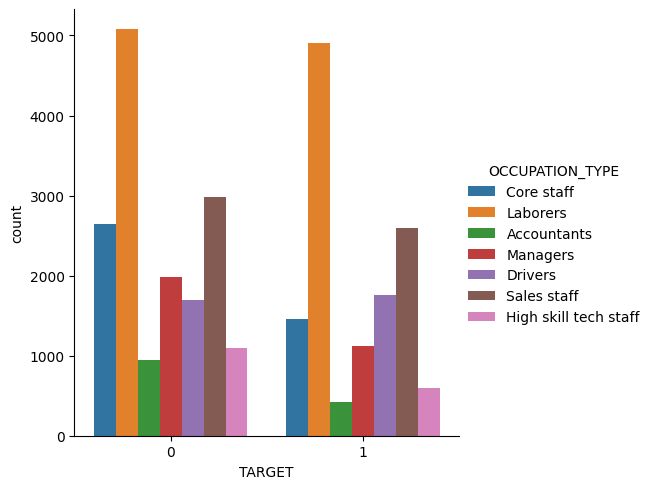

In [ ]:
temp_occupation = application_train.loc[application_train['OCCUPATION_TYPE'].isin(['Laborers', 'Sales staff', 'Core staff','Managers','Drivers','High skill tech staff','Accountants'])]
sns.catplot(x = 'TARGET',hue="OCCUPATION_TYPE", kind="count", data=temp_occupation)

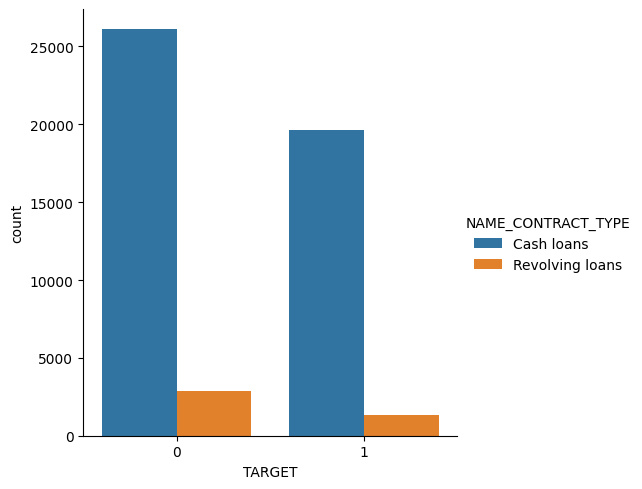

In [ ]:
sns.catplot(x = 'TARGET',hue="NAME_CONTRACT_TYPE", kind="count", data=application_train)

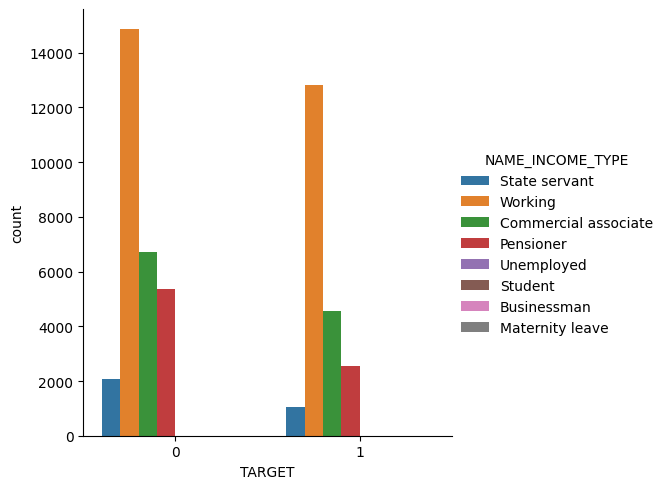

In [ ]:
sns.catplot(x = 'TARGET',hue="NAME_INCOME_TYPE", kind="count", data=application_train)

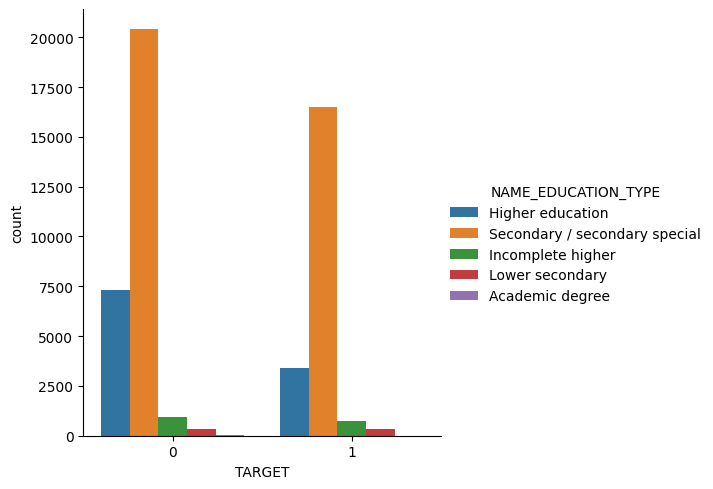

In [ ]:
sns.catplot(x = 'TARGET',hue="NAME_EDUCATION_TYPE", kind="count", data=application_train)

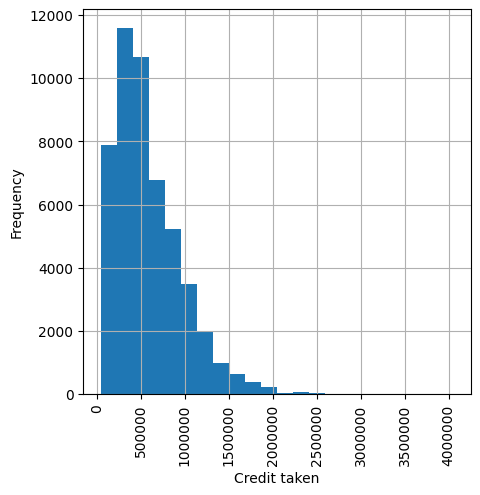

In [ ]:
minimum = int(application_train['AMT_CREDIT'].min())
maximum = int(application_train['AMT_CREDIT'].max())  
n = application_train['AMT_CREDIT'].quantile(.1)
x = int((maximum-minimum)/n)
application_train['AMT_CREDIT'].hist(bins=x,figsize=(5,5),xrot=90).ticklabel_format(style='plain')
plt.xlabel('Credit taken')
plt.ylabel("Frequency");

(0.0, 1000000.0)

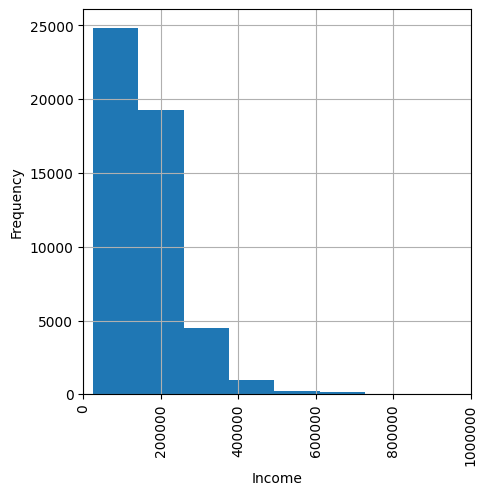

In [ ]:
minimum = int(application_train['AMT_INCOME_TOTAL'].min())
maximum = int(application_train['AMT_INCOME_TOTAL'].max())  
n = application_train['AMT_INCOME_TOTAL'].quantile(.5)
x = int((maximum-minimum)/n)
application_train['AMT_INCOME_TOTAL'].hist(bins=1000,figsize=(5,5),xrot=90).ticklabel_format(style='plain')
plt.xlabel('Income')
plt.ylabel("Frequency");
plt.xlim(0, 1000000)

#minimum = int(application_train['AMT_INCOME_TOTAL'].min())
#maximum = int(application_train['AMT_INCOME_TOTAL'].max())  
#n = application_train['AMT_INCOME_TOTAL'].quantile(.5)
#x = int((maximum-minimum)/n)
#np.log10(application_train['AMT_INCOME_TOTAL']).hist(bins=1000,figsize=(5,5),xrot=90)
#plt.xlabel('Log10 of Income')
#plt.ylabel("Frequency");
#plt.xlim(4, 7)


<ipython-input-26-d8c0895208ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Age'] = application_train['DAYS_BIRTH']*-1/365


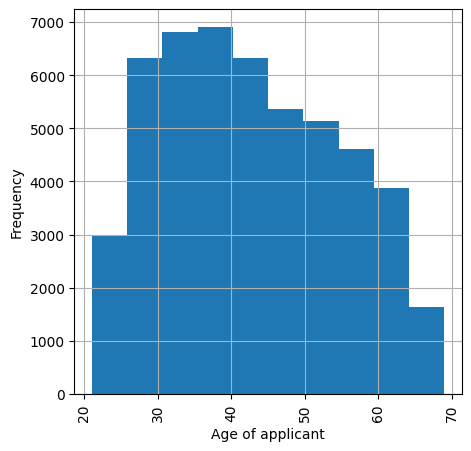

In [ ]:
temp = application_train
temp['Age'] = application_train['DAYS_BIRTH']*-1/365
minimum = int(temp['Age'].min())
maximum = int(temp['Age'].max())  
n = temp['Age'].quantile(.1)
x = int((maximum-minimum)/n)
temp['Age'].hist(bins=10,figsize=(5,5),xrot=90).ticklabel_format(style='plain')
plt.xlabel('Age of applicant')
plt.ylabel("Frequency");

In [ ]:
!curl https://bootstrap.pypa.io/pip/2.7/get-pip.py -o get-pip.py
!python get-pip.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1863k  100 1863k    0     0  11.6M      0 --:--:-- --:--:-- --:--:-- 11.6M
/usr/local/lib/python3.9/dist-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pip-20.3.4-py2.py3-none-any.whl (1.5 MB)
  Attempting uninstall: pip
    Found existing installation: pip 20.3.4
    Uninstalling pip-20.3.4:
      Successfully uninstalled pip-20.3.4
/usr/local/lib/python3.9/dist-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/setuptools/command/i

In [ ]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in application_train:
    if application_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(application_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(application_train[col])
            # Transform both training and testing data
            application_train[col] = le.transform(application_train[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

4 columns were label encoded.


<ipython-input-29-00924bf856fb>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  application_train[col] = le.transform(application_train[col])
<ipython-input-29-00924bf856fb>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  application_train[col] = le.transform(application_train[col])
<ipython-input-29-00924bf856fb>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [ ]:
application_train = pd.get_dummies(application_train)

print('Training Features shape: ', application_train.shape)

Training Features shape:  (50000, 184)


In [ ]:
train_labels = application_train['TARGET']

print('Training Features shape: ', application_train.shape)

Training Features shape:  (50000, 184)


In [ ]:
(application_train['DAYS_BIRTH'] / -365).describe()

count    50000.000000
mean        42.780023
std         11.884138
min         21.035616
25%         32.767123
50%         41.647945
75%         52.504110
max         68.991781
Name: DAYS_BIRTH, dtype: float64

In [ ]:
application_train['DAYS_EMPLOYED'].describe()

count     50000.000000
mean      55964.917940
std      134111.640609
min      -16365.000000
25%       -2535.250000
50%       -1140.000000
75%        -327.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

The maximum value (besides being positive) is about 1000 years! That doesn't look right! 

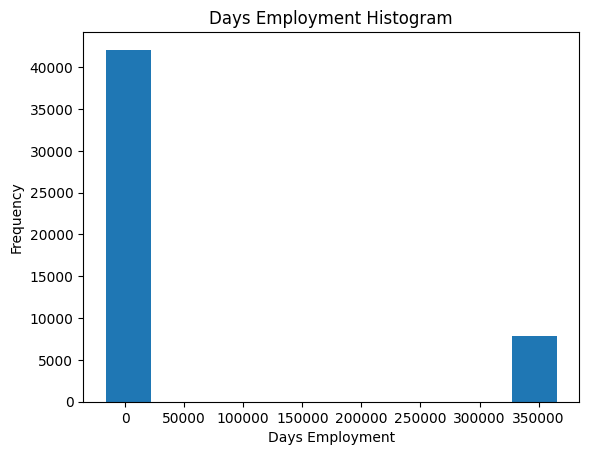

In [ ]:
application_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [ ]:
anom = application_train[application_train['DAYS_EMPLOYED'] == 365243]
non_anom = application_train[application_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 43.85% of loans
The anomalies default on 32.14% of loans
There are 7912 anomalous days of employment


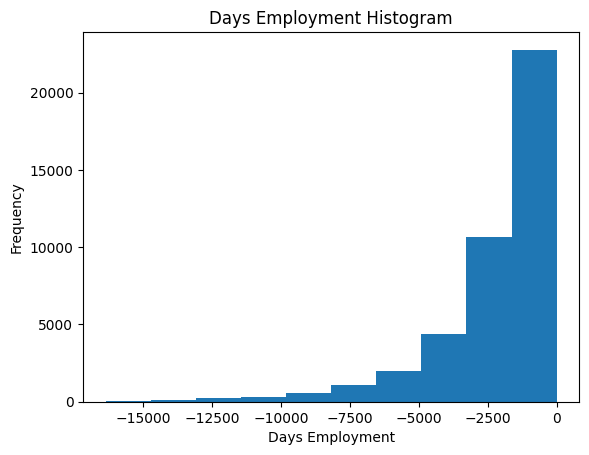

In [ ]:
# Create an anomalous flag column
application_train['DAYS_EMPLOYED_ANOM'] = application_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
application_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

application_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [ ]:
correlations = application_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(20))
print('\nMost Negative Correlations:\n', correlations.head(20))

Most Positive Correlations:
 DEF_60_CNT_SOCIAL_CIRCLE                             0.057666
REG_CITY_NOT_LIVE_CITY                               0.066188
OCCUPATION_TYPE_Laborers                             0.072459
DAYS_REGISTRATION                                    0.073345
REG_CITY_NOT_WORK_CITY                               0.083918
FLAG_DOCUMENT_3                                      0.084062
FLAG_EMP_PHONE                                       0.086623
DAYS_ID_PUBLISH                                      0.089968
NAME_EDUCATION_TYPE_Secondary / secondary special    0.092578
CODE_GENDER                                          0.097047
NAME_INCOME_TYPE_Working                             0.098088
DAYS_LAST_PHONE_CHANGE                               0.103182
REGION_RATING_CLIENT                                 0.110469
REGION_RATING_CLIENT_W_CITY                          0.113786
DAYS_BIRTH                                           0.141825
DAYS_EMPLOYED                            

### Feature Engineering

In [ ]:
poly_features = application_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'Age', 'NAME_EDUCATION_TYPE_Higher education',
                                   'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY','DAYS_BIRTH', 'DAYS_EMPLOYED','TARGET']]

# imputer for handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 2)

In [ ]:
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (50000, 66)


In [ ]:
#!pip install -U scikit-learn
#!pip install --upgrade --user scikit-learn
#!pip install --upgrade pip
#!pip install -U --user scikit-learn
#!pip uninstall scikit-learn

In [ ]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-1.2.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)
  Using cached scikit_learn-1.2.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)


In [ ]:
#poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'Age', 'NAME_EDUCATION_TYPE_Higher education',
#                                   'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY','DAYS_BIRTH', 'DAYS_EMPLOYED'])

poly_features = application_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'Age', 'NAME_EDUCATION_TYPE_Higher education',
                                   'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY','DAYS_BIRTH', 'DAYS_EMPLOYED','TARGET']]

# imputer for handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 2)
                                 

In [ ]:
#poly_features = pd.DataFrame(poly_features, 
#                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'Age', 'NAME_EDUCATION_TYPE_Higher education',
#                                  'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY','DAYS_BIRTH', 'DAYS_EMPLOYED']))


# Add in the target
#poly_features['TARGET'] = poly_target

# Find the correlations with the target
#poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
#print(poly_corrs.head(10))
#print(poly_corrs.tail(5))
poly_transformer = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
poly_features = poly_transformer.fit_transform(poly_features)

# Get the feature names for the polynomial features
poly_feature_names = poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'Age', 'NAME_EDUCATION_TYPE_Higher education',
                                                         'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_BIRTH', 'DAYS_EMPLOYED'])
# Create a DataFrame with the polynomial features
poly_features = pd.DataFrame(poly_features, columns=poly_feature_names)

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))



EXT_SOURCE_2 EXT_SOURCE_3           -0.349937
EXT_SOURCE_1 EXT_SOURCE_3           -0.302985
EXT_SOURCE_1 EXT_SOURCE_2           -0.298062
EXT_SOURCE_2 Age                    -0.279568
EXT_SOURCE_3 Age                    -0.277060
EXT_SOURCE_3                        -0.276283
EXT_SOURCE_2                        -0.271710
EXT_SOURCE_2^2                      -0.265491
EXT_SOURCE_3^2                      -0.264204
EXT_SOURCE_2 REGION_RATING_CLIENT   -0.203142
Name: TARGET, dtype: float64
EXT_SOURCE_3 DAYS_EMPLOYED    0.191844
EXT_SOURCE_1 DAYS_BIRTH       0.195881
EXT_SOURCE_3 DAYS_BIRTH       0.277060
EXT_SOURCE_2 DAYS_BIRTH       0.279568
TARGET                        1.000000
Name: TARGET, dtype: float64


In [ ]:
poly_features.shape

(50000, 66)

In [ ]:
# Merge polynomial features into training dataframe
#poly_features['SK_ID_CURR'] = application_train['SK_ID_CURR'] 
#poly_features = poly_features.drop(columns = ['TARGET','1'])
#application_train_final = application_train[['SK_ID_CURR','NAME_EDUCATION_TYPE_Higher education','REG_CITY_NOT_WORK_CITY', 'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE'
#         ,'NAME_INCOME_TYPE_Working', 'AMT_INCOME_TOTAL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']]
#application_train_poly = application_train_final.merge(poly_features, on = 'SK_ID_CURR', how = 'left')
# Print out the new shapes
#print('Training data with polynomial features shape: ', application_train_poly.shape)
#print('Training data with polynomial features shape: ', application_train_poly.shape)


# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = application_train['SK_ID_CURR'] 
poly_features = poly_features.drop(columns = ['TARGET'])
application_train_final = application_train[['SK_ID_CURR','NAME_EDUCATION_TYPE_Higher education','REG_CITY_NOT_WORK_CITY', 'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE'
         ,'NAME_INCOME_TYPE_Working', 'AMT_INCOME_TOTAL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']]
application_train_poly = application_train_final.merge(poly_features, on = 'SK_ID_CURR', how = 'left')
# Print out the new shapes
#print('Training data with polynomial features shape: ', application_train_poly.shape)
print('Training data with polynomial features shape: ', application_train_poly.shape)




Training data with polynomial features shape:  (50000, 74)


In [ ]:
application_train_poly = application_train_poly.drop(columns = ['SK_ID_CURR'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

train = imputer.fit_transform(application_train_poly)

scaler = MinMaxScaler(feature_range = (0, 1))

scaler.fit(train)

train_scaled = pd.DataFrame(scaler.transform(train), columns=application_train_poly.columns)

print('Training data shape: ', train.shape)

Training data shape:  (50000, 73)


In [ ]:
target = application_train['TARGET']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(train_scaled, target, test_size=0.3, random_state=30)


### Logistic Regression

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix : 
       0     1
0  6826  1873
1  2864  3437
Test accuracy =  68.42 %
              precision    recall  f1-score   support

           0       0.70      0.78      0.74      8699
           1       0.65      0.55      0.59      6301

    accuracy                           0.68     15000
   macro avg       0.68      0.67      0.67     15000
weighted avg       0.68      0.68      0.68     15000

AUC for Logistic:	0.7353144678086431


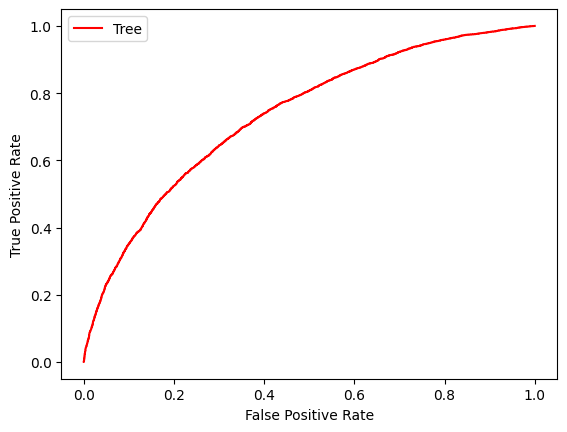

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, accuracy_score)
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


# for i in range(10):
# Make the model with the specified regularization parameter
# j=0.05
log_reg = LogisticRegression(C = 5)
# j=j+j
# Train on the training data
log_reg.fit(X_train, Y_train)

log_reg_pred = log_reg.predict(X_test)

prediction = list(map(round, log_reg_pred))

# confusion matrix
cm = confusion_matrix(Y_test, prediction)
cm=pd.DataFrame(cm)
print ("Confusion Matrix : \n", cm)

# accuracy score of the model
Test_accuracy = accuracy_score(Y_test, prediction)
print('Test accuracy = ', Test_accuracy*100,"%")
print(classification_report(Y_test, prediction))

predictedTree = log_reg.predict_proba(X_test)[:,1]


print(f'AUC for Logistic:\t{roc_auc_score(Y_test, predictedTree)}')
fpTreeL, tpTreeL, threshTreeL = roc_curve(Y_test, predictedTree)

plt.plot(fpTreeL, tpTreeL,'r',label = 'Tree')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Random Forest Classifier

Confusion Matrix : 
       0     1
0  6842  1857
1  2903  3398
Test accuracy =  68.26666666666667 %
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      8699
           1       0.65      0.54      0.59      6301

    accuracy                           0.68     15000
   macro avg       0.67      0.66      0.67     15000
weighted avg       0.68      0.68      0.68     15000

AUC for Random Forest:	0.7321663662267364


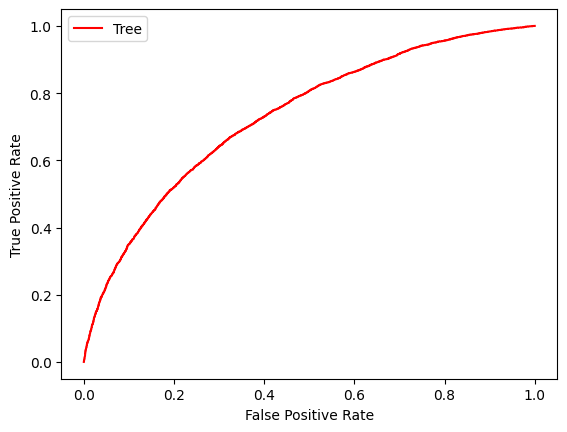

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 400, max_depth=13, random_state = 50, verbose = 0, n_jobs = -1)
random_forest.fit(X_train, Y_train)

random_forest_pred = random_forest.predict(X_test)

prediction = list(map(round, random_forest_pred))
cm = confusion_matrix(Y_test, prediction)
cm=pd.DataFrame(cm)
print ("Confusion Matrix : \n", cm)
 
# accuracy score of the model
Test_accuracy = accuracy_score(Y_test, prediction)
print('Test accuracy = ', Test_accuracy*100,"%")

print(classification_report(Y_test, prediction))

predictedTree = random_forest.predict_proba(X_test)[:,1]


print(f'AUC for Random Forest:\t{roc_auc_score(Y_test, predictedTree)}')
fpTreeR, tpTreeR, threshTreeR = roc_curve(Y_test, predictedTree)

plt.plot(fpTreeR, tpTreeR,'r',label = 'Tree')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Decision tree

Confusion Matrix : 
       0     1
0  5569  3130
1  3008  3293
Test accuracy =  59.08 %
              precision    recall  f1-score   support

           0       0.65      0.64      0.64      8699
           1       0.51      0.52      0.52      6301

    accuracy                           0.59     15000
   macro avg       0.58      0.58      0.58     15000
weighted avg       0.59      0.59      0.59     15000

AUC for Decision Tree:	0.5814019926403878


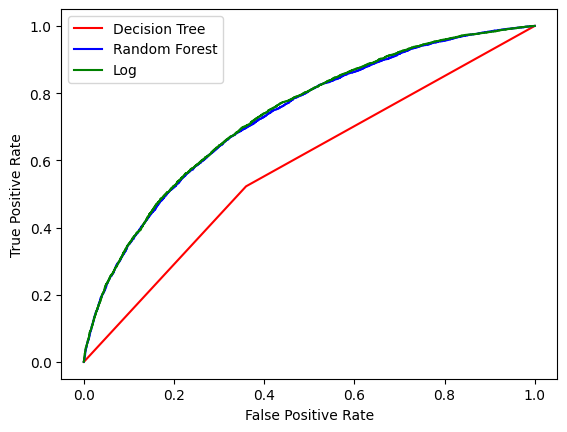

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score
decision_model = DecisionTreeClassifier()
decision_model.fit(X_train, Y_train)
decision_model_pred = decision_model.predict(X_test)

dec_prediction = list(map(round, decision_model_pred))
from sklearn.metrics import roc_curve
# accuracy score of the model
cm = confusion_matrix(Y_test, dec_prediction)
cm=pd.DataFrame(cm)
print ("Confusion Matrix : \n", cm)
Test_accuracy = accuracy_score(Y_test, dec_prediction)
print('Test accuracy = ', Test_accuracy*100,"%")

print(classification_report(Y_test, dec_prediction))

predictedTree = decision_model.predict_proba(X_test)[:,1]

print(f'AUC for Decision Tree:\t{roc_auc_score(Y_test, predictedTree)}')

fpTreeD, tpTreeD, threshTreeD = roc_curve(Y_test, predictedTree)

plt.plot(fpTreeD, tpTreeD,'r',label = 'Decision Tree')
plt.plot(fpTreeR, tpTreeR,'b',label = 'Random Forest')
plt.plot(fpTreeL, tpTreeL,'g',label = 'Log')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### SVM

In [ ]:
##do not use this, use below one, same code
#from sklearn.svm import SVC, NuSVC, LinearSVC

#clf1 = SVC(1.0, degree=3, gamma='auto', probability=True)
#clf1 = SVC(C=1.0, degree=3, gamma='auto', probability=True)

#####clf2 = NuSVC()
####linSVC = LinearSVC(1, probability=True)

#for clf in [clf1]:
#    clf.fit(X_train, Y_train)                         
#    predicted= np.array(clf.predict(X_test))
#    cm = confusion_matrix(Y_test, predicted,labels=[1,0])
#    cm=pd.DataFrame(cm)
#    print ("Confusion Matrix : \n", cm)
#    print("accuracy:", accuracy_score(Y_test, predicted)*100)
#    test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, predicted)
#    predictedTree = clf.predict_proba(X_test)[:,1]

#    print(f'AUC for SVM:\t{roc_auc_score(Y_test, predictedTree)}')
    

Confusion Matrix : 
       0     1
0  2946  3355
1  1448  7251
accuracy: 67.97999999999999
AUC for SVM:	0.7331298526087136


Confusion Matrix : 
       0     1
0  2946  3355
1  1448  7251
accuracy: 67.97999999999999
AUC for SVM:	0.7331291593349161


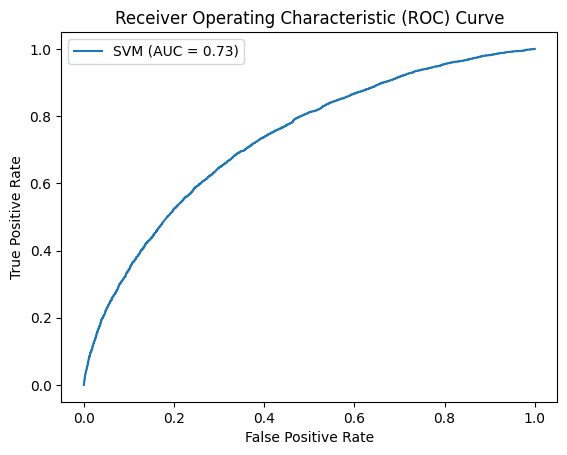

In [ ]:
#newly added
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

#clf1 = SVC(1.0, degree=3, gamma='auto', probability=True)
clf1 = SVC(C=1.0, degree=3, gamma='auto', probability=True)

#clf2 = NuSVC()
#linSVC = LinearSVC(1, probability=True)

for clf in [clf1]:
    clf.fit(X_train, Y_train)                         
    predicted= np.array(clf.predict(X_test))
    cm = confusion_matrix(Y_test, predicted,labels=[1,0])
    cm=pd.DataFrame(cm)
    print ("Confusion Matrix : \n", cm)
    print("accuracy:", accuracy_score(Y_test, predicted)*100)
    predictedTree = clf.predict_proba(X_test)[:,1]

    print(f'AUC for SVM:\t{roc_auc_score(Y_test, predictedTree)}')
    fpr, tpr, thresholds = roc_curve(Y_test, predictedTree)
    plt.plot(fpr, tpr, label=f'SVM (AUC = {roc_auc_score(Y_test, predictedTree):.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


Confusion Matrix: 
       0     1
0  2946  3355
1  1448  7251
Accuracy Score: 67.97999999999999
AUC for SVM: 0.7331278822516052
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.83      0.75      8699
           1       0.67      0.47      0.55      6301

    accuracy                           0.68     15000
   macro avg       0.68      0.65      0.65     15000
weighted avg       0.68      0.68      0.67     15000



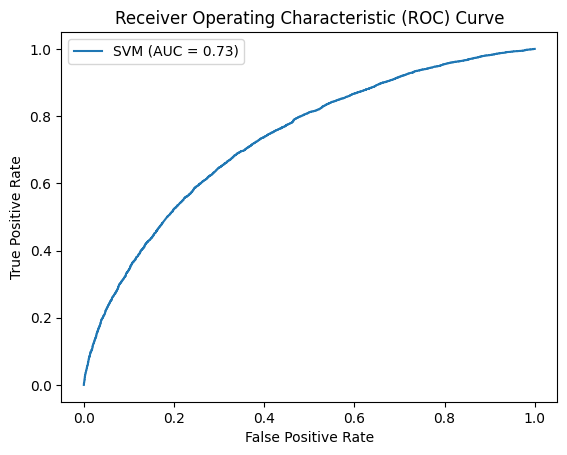

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

clf1 = SVC(C=1.0, degree=3, gamma='auto', probability=True)

for clf in [clf1]:
    clf.fit(X_train, Y_train)                         
    predicted= np.array(clf.predict(X_test))
    cm = confusion_matrix(Y_test, predicted, labels=[1,0])
    cm=pd.DataFrame(cm)
    print("Confusion Matrix: \n", cm)
    
    print("Accuracy Score:", accuracy_score(Y_test, predicted)*100)
    
    predictedTree = clf.predict_proba(X_test)[:,1]

    print(f'AUC for SVM: {roc_auc_score(Y_test, predictedTree)}')
    
    print("Classification Report:\n", classification_report(Y_test, predicted))
    
    fpr, tpr, thresholds = roc_curve(Y_test, predictedTree)
    plt.plot(fpr, tpr, label=f'SVM (AUC = {roc_auc_score(Y_test, predictedTree):.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


### Neural nets

In [ ]:
import sklearn.neural_network
model = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', 
                                                 alpha=0.0001, batch_size=32, learning_rate='adaptive', learning_rate_init=0.001, power_t=0.5, 
                                                 max_iter=100, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, 
                                                 nesterovs_momentum=True, early_stopping=True, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
                                                 n_iter_no_change=10)
    # Train the model on the whole data set
model.fit(X_train, Y_train)
print('\n---- Test data ----')
predictions = model.predict(X_test)
accuracy = sklearn.metrics.accuracy_score(Y_test, predictions)
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(Y_test, predictions))
print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(Y_test, predictions))
predictedTree = model.predict_proba(X_test)[:,1]

print(f'AUC Tree:\t{roc_auc_score(Y_test, predictedTree)}')

# fpTreeN, tpTreeN, threshTreeN = roc_curve(Y_test, predictedTree)

# plt.plot(fpTreeD, tpTreeD,'r',label = 'Decision Tree')
# plt.plot(fpTreeN, fpTreeN,'b',label = 'Neural Net')
# plt.plot(fpTreeL, tpTreeL,'g',label = 'Log')
# plt.legend()
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.show()


---- Test data ----
Accuracy: 68.16
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.77      0.74      8699
           1       0.64      0.56      0.60      6301

    accuracy                           0.68     15000
   macro avg       0.67      0.66      0.67     15000
weighted avg       0.68      0.68      0.68     15000

Confusion Matrix:
[[6708 1991]
 [2785 3516]]
AUC Tree:	0.7332747285883254



---- Test data ----
Accuracy: 68.39
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.80      0.75      8699
           1       0.65      0.53      0.58      6301

    accuracy                           0.68     15000
   macro avg       0.68      0.66      0.66     15000
weighted avg       0.68      0.68      0.68     15000

Confusion Matrix:
[[6928 1771]
 [2971 3330]]

---- Test data ----
Accuracy: 0.6693333333333333
Confusion Matrix : 
       0     1
0  3106  3195
1  1765  6934
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.80      0.74      8699
           1       0.64      0.49      0.56      6301

    accuracy                           0.67     15000
   macro avg       0.66      0.65      0.65     15000
weighted avg       0.66      0.67      0.66     15000



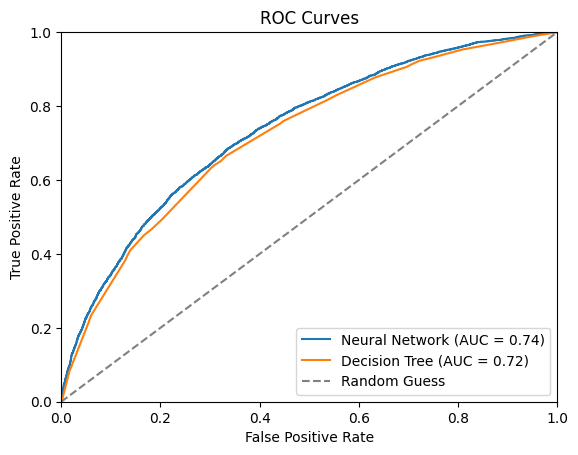

In [ ]:
#NEWLY ADDED
import sklearn.neural_network
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Neural network model
model = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', 
                                                 alpha=0.0001, batch_size=32, learning_rate='adaptive', learning_rate_init=0.001, power_t=0.5, 
                                                 max_iter=100, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, 
                                                 nesterovs_momentum=True, early_stopping=True, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
                                                 n_iter_no_change=10)
    
# Train the model on the whole data set
model.fit(X_train, Y_train)
print('\n---- Test data ----')
predictions = model.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))
print('Classification Report:')
print(classification_report(Y_test, predictions))
print('Confusion Matrix:')
print(confusion_matrix(Y_test, predictions))
predictedTree = model.predict_proba(X_test)[:,1]

# Plot ROC curve for neural network model
fpr_nn, tpr_nn, thresholds_nn = roc_curve(Y_test, predictedTree)
auc_nn = roc_auc_score(Y_test, predictedTree)
plt.plot(fpr_nn, tpr_nn, label='Neural Network (AUC = %0.2f)' % auc_nn)

# Decision tree model
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train the model
tree_model.fit(X_train, Y_train)

# Evaluate the model on test data
predicted = tree_model.predict(X_test)
cm = confusion_matrix(Y_test, predicted, labels=[1,0])
cm = pd.DataFrame(cm)
print("\n---- Test data ----")
print("Accuracy:", accuracy_score(Y_test, predicted))
print("Confusion Matrix : \n", cm)
print("Classification Report:\n", classification_report(Y_test, predicted))
predictedTree = tree_model.predict_proba(X_test)[:,1]

# Plot ROC curve for decision tree model
fpr_tree, tpr_tree, thresholds_tree = roc_curve(Y_test, predictedTree)
auc_tree = roc_auc_score(Y_test, predictedTree)
plt.plot(fpr_tree, tpr_tree, label='Decision Tree (AUC = %0.2f)' % auc_tree)

# Plot settings
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guess')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization

def classification():
    model = Sequential()
    model.add(Dense(73, input_dim=73, activation='relu'))
#     model.add(Dense(28, activation='relu'))
    model.add(Dense(37, activation='relu'))
    model.add(Dense(1, activation='tanh'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
NeuralNet_3layer = classification()
NeuralNet_3layer.fit(X_train, Y_train, batch_size=10,verbose=0,epochs=100)
NeuralNet_3_pred = NeuralNet_3layer.predict(X_test)


469/469 [==============================] - 1s 1ms/step


In [ ]:
prediction = pd.DataFrame(NeuralNet_3_pred.round())
# df_1s = application_train.loc[(application_train['TARGET'] == 1)]
cm = confusion_matrix(Y_test, prediction)
cm=pd.DataFrame(cm)
print ("Confusion Matrix : \n", cm)
Test_accuracy = accuracy_score(Y_test, prediction)
print('Test accuracy = ', Test_accuracy*100,"%")

print(classification_report(Y_test, prediction))

print(f'AUC Tree for 3 Layer Neural net:\t{roc_auc_score(Y_test, prediction)}')

Confusion Matrix : 
     0     1     2
0   0     0     0
1  92  6634  1973
2  15  2764  3522
Test accuracy =  67.70666666666668 %
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.71      0.76      0.73      8699
         1.0       0.64      0.56      0.60      6301

    accuracy                           0.68     15000
   macro avg       0.45      0.44      0.44     15000
weighted avg       0.68      0.68      0.68     15000

AUC Tree for 3 Layer Neural net:	0.6674874967614536


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix : 
       0     1
0  7454  1245
1  3577  2724
Test accuracy =  67.85333333333334 %
              precision    recall  f1-score   support

           0       0.68      0.86      0.76      8699
           1       0.69      0.43      0.53      6301

    accuracy                           0.68     15000
   macro avg       0.68      0.64      0.64     15000
weighted avg       0.68      0.68      0.66     15000



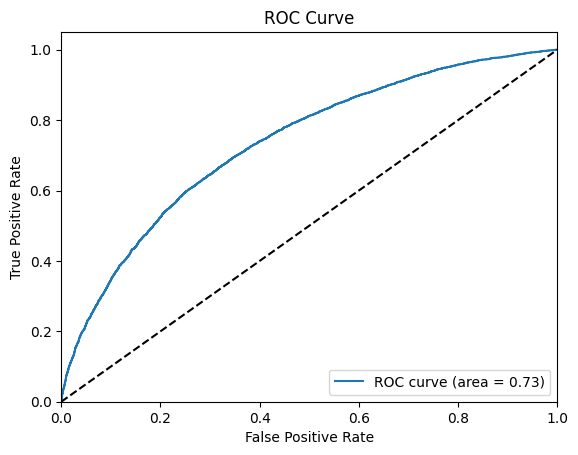

AUC for 3 Layer Neural net:	0.7344978642514807


In [ ]:
#newly added, need to check
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.neural_network import MLPClassifier

# create and fit the neural network model
model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', 
                      alpha=0.0001, batch_size=32, learning_rate='adaptive', 
                      learning_rate_init=0.001, power_t=0.5, max_iter=100, shuffle=True, 
                      random_state=None, tol=0.0001, verbose=False, warm_start=False, 
                      momentum=0.9, nesterovs_momentum=True, early_stopping=True, 
                      validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
                      n_iter_no_change=10)

model.fit(X_train, Y_train)

# make predictions on the test set
predictions = model.predict(X_test)

# calculate accuracy and confusion matrix
cm = confusion_matrix(Y_test, predictions)
cm = pd.DataFrame(cm)
print("Confusion Matrix : \n", cm)

Test_accuracy = accuracy_score(Y_test, predictions)
print('Test accuracy = ', Test_accuracy*100,"%")

print(classification_report(Y_test, predictions))

# calculate and plot ROC curve
predictedTree = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, predictedTree)
roc_auc = roc_auc_score(Y_test, predictedTree)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f'AUC for 3 Layer Neural net:\t{roc_auc}') 


In [ ]:
#ensemble code for Logistic Regression, Random Forest Classifier, and Support Vector Classifier (SVC) 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection

clf1 = LogisticRegression(C = 5)
clf2 = RandomForestClassifier(n_estimators = 400, max_depth=13, random_state = 50, verbose = 0, n_jobs = -1)
clf3 = SVC(C=1.0, degree=3, gamma='auto', probability=True)

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('svm', clf3)], voting='soft')

eclf.fit(X_train, Y_train)                         
predicted = np.array(eclf.predict(X_test))
cm = sklearn.metrics.confusion_matrix(Y_test, predicted,labels=[1,0])
cm=pd.DataFrame(cm)
print("accuracy:", sklearn.metrics.accuracy_score(predicted,Y_test))
print ("Confusion Matrix : \n", cm)
print(f'AUC Tree:\t{roc_auc_score(Y_test, predictedTree)}')

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6858
Confusion Matrix : 
       0     1
0  3306  2995
1  1718  6981
AUC Tree:	0.7344978642514807


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report

clf1 = LogisticRegression(C = 5)
clf2 = RandomForestClassifier(n_estimators = 400, max_depth=13, random_state = 50, verbose = 0, n_jobs = -1)
clf3 = SVC(C=1.0, degree=3, gamma='auto', probability=True)

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('svm', clf3)], voting='soft')

eclf.fit(X_train, Y_train)                         
predicted = np.array(eclf.predict(X_test))
cm = confusion_matrix(Y_test, predicted, labels=[1,0])
cm = pd.DataFrame(cm)
print("Accuracy:", accuracy_score(Y_test, predicted))
print("Confusion Matrix:\n", cm)
print(classification_report(Y_test, predicted))
print(f'AUC Score: {roc_auc_score(Y_test, predicted)}')


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6858
Confusion Matrix:
       0     1
0  3306  2995
1  1718  6981
              precision    recall  f1-score   support

           0       0.70      0.80      0.75      8699
           1       0.66      0.52      0.58      6301

    accuracy                           0.69     15000
   macro avg       0.68      0.66      0.67     15000
weighted avg       0.68      0.69      0.68     15000

AUC Score: 0.6635923288086697


In [ ]:
#visualization for ensemble model
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix plot
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC curve plot
fpr, tpr, thresholds = roc_curve(Y_test, eclf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [ ]:
!jupyter nbconvert HomeloanDefaultRisk.ipynb --to=pdf --TemplateExporter.exclude_input=True

[NbConvertApp] WARNING | pattern 'HomeloanDefaultRisk.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--exe

Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

gbc.fit(X_train, Y_train)

gbc_pred = gbc.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, gbc_pred))

print(classification_report(Y_test, gbc_pred))

print("Confusion Matrix:\n", confusion_matrix(Y_test, gbc_pred))

gbc_prob = gbc.predict_proba(X_test)[:,1]

print("AUC:", roc_auc_score(Y_test, gbc_prob))


Accuracy: 0.6862
              precision    recall  f1-score   support

           0       0.71      0.79      0.74      8699
           1       0.65      0.55      0.60      6301

    accuracy                           0.69     15000
   macro avg       0.68      0.67      0.67     15000
weighted avg       0.68      0.69      0.68     15000

Confusion Matrix:
 [[6830 1869]
 [2838 3463]]
AUC: 0.7361040154436591


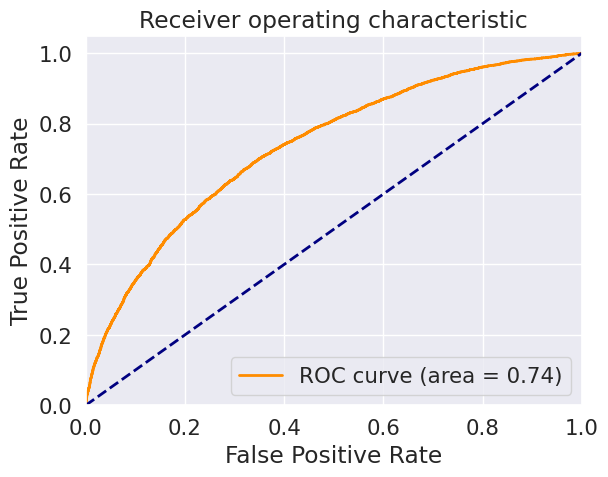

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict class probabilities for test set
#y_score = gb_model.predict_proba(X_test)[:,1]

# Compute ROC curve and ROC area
#fpr, tpr, thresholds = roc_curve(Y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Gradient Boosting Regressor

accuracy: 0.6864
Confusion Matrix : 
       0     1
0  3424  2877
1  1827  6872
              precision    recall  f1-score   support

           0       0.70      0.79      0.75      8699
           1       0.65      0.54      0.59      6301

    accuracy                           0.69     15000
   macro avg       0.68      0.67      0.67     15000
weighted avg       0.68      0.69      0.68     15000

AUC:	0.6666908339479904


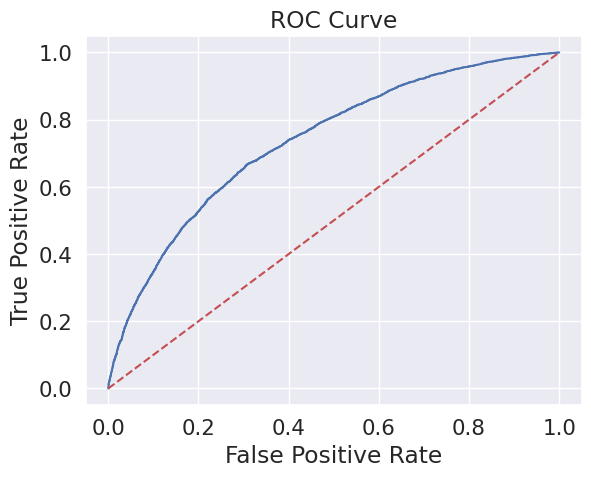

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Train the model
gb_model = GradientBoostingClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, Y_train)

# Evaluate the model on test data
predicted = gb_model.predict(X_test)
cm = confusion_matrix(Y_test, predicted, labels=[1,0])
cm = pd.DataFrame(cm)
print("accuracy:", accuracy_score(predicted, Y_test))
print("Confusion Matrix : \n", cm)
print(classification_report(Y_test, predicted))
print(f'AUC:\t{roc_auc_score(Y_test, predicted)}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, gb_model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


Ensemble Logistic Regression, Random Forest Classifier, and Support Vector Classifier (SVC), two-layer and three-layer Neural Nets, Gradient Boosting Classifier, and Gradient Boosting Regressor:

In [ ]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, GradientBoostingRegressor, VotingClassifier
#from sklearn.svm import SVC
#from sklearn.neural_network import MLPClassifier
#from sklearn.metrics import roc_auc_score, mean_squared_error
#from sklearn.model_selection import train_test_split
#import pandas as pd
#import numpy as np

# load the data
#data = pd.read_csv('data.csv')

# split the data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.2, random_state=42)

# create the base models
#lr = LogisticRegression()
#rf = RandomForestClassifier(n_estimators=100)
#svc = SVC(probability=True)
#nn2 = MLPClassifier(hidden_layer_sizes=(100,))
#nn3 = MLPClassifier(hidden_layer_sizes=(100, 100))
#gbc = GradientBoostingClassifier()
#gbr = GradientBoostingRegressor()

# create the ensemble model
#ensemble = VotingClassifier(estimators=[('lr', lr), ('rf', rf), ('svc', svc), ('nn2', nn2), ('nn3', nn3), ('gbc', gbc), ('gbr', gbr)], voting='soft')

# fit the model on the training data
#ensemble.fit(X_train, y_train)

# make predictions on the test data
#y_pred = ensemble.predict(X_test)

# calculate the accuracy score
#accuracy = np.mean(y_pred == y_test)
#print("Accuracy:", accuracy)

# calculate the AUC score
#y_pred_proba = ensemble.predict_proba(X_test)[:, 1]
#auc = roc_auc_score(y_test, y_pred_proba)
#print("AUC:", auc)

# calculate the mean squared error for the regression task
#y_reg_pred = ensemble.predict(X_test)
#mse = mean_squared_error(y_test, y_reg_pred)
#print("MSE:", mse)


Visualization

In [ ]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
#from sklearn.neural_network import MLPClassifier
#from sklearn.svm import SVC
#from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
#import matplotlib.pyplot as plt

# Define the classifiers
#clf1 = LogisticRegression(C=5)
#clf2 = RandomForestClassifier(n_estimators=400, max_depth=13, random_state=50, verbose=0, n_jobs=-1)
#clf3 = SVC(C=1.0, degree=3, gamma='auto', probability=True)
#clf4 = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001,
#                     batch_size=32, learning_rate='adaptive', learning_rate_init=0.001, power_t=0.5,
#                     max_iter=100, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False,
#                     momentum=0.9, nesterovs_momentum=True, early_stopping=True, validation_fraction=0.1, beta_1=0.9,
#                     beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)
#clf5 = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', alpha=0.0001,
#                     batch_size=32, learning_rate='adaptive', learning_rate_init=0.001, power_t=0.5,
#                     max_iter=100, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False,
#                     momentum=0.9, nesterovs_momentum=True, early_stopping=True, validation_fraction=0.1, beta_1=0.9,
#                     beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)
#clf6 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

# Create the ensemble
#ensemble = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('svm', clf3), ('nn2', clf4), ('nn3', clf5), ('gb', clf6)],
#                            voting='soft')

# Train the ensemble
#ensemble.fit(X_train, Y_train)

# Predict the target variable for the test set
#predicted = ensemble.predict(X_test)

# Compute the confusion matrix
#cm = confusion_matrix(Y_test, predicted, labels=[1, 0])
#cm = pd.DataFrame(cm)
#print("Accuracy:", accuracy_score(predicted, Y_test))
#print("Confusion Matrix:\n", cm)

# Compute the ROC curve
#probas = ensemble.predict_proba(X_test)[:, 1]
#fpr, tpr, thresholds = roc_curve(Y_test, probas)

# Compute the AUC score
#auc_score = roc_auc_score(Y_test, probas)
#print(f"AUC Score: {auc_score}")

# Plot the confusion matrix
#plt.figure()
#plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
#plt.title("Confusion Matrix")
#plt.colorbar()
#tick_marks = np.arange(len(['1', '0']))
#plt.xticks(tick_marks, ['1', '0'])
#plt.yticks(tick_marks, ['1', '0'])
#plt.ylabel('True label')
#plt.xlabel('Predicted label')
#thresh = cm.max() / 2
#for i


More Models

AdaBoost Classifier

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Confusion Matrix : 
       0     1
0  6837  1862
1  2904  3397
Test accuracy =  68.22666666666667 %
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      8699
           1       0.65      0.54      0.59      6301

    accuracy                           0.68     15000
   macro avg       0.67      0.66      0.66     15000
weighted avg       0.68      0.68      0.68     15000

AUC for AdaBoost:	0.7357145323998682


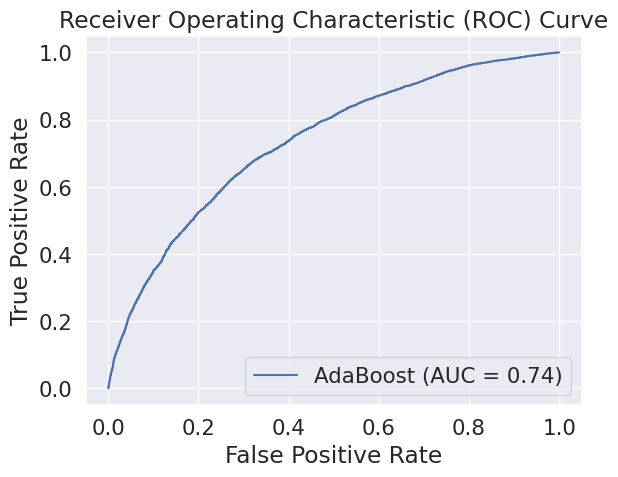

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)

# Create the AdaBoost Classifier
ada_boost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, learning_rate=1.0, random_state=42)

# Train the model on the training data
ada_boost.fit(X_train, Y_train)

# Make predictions on the test data
ada_boost_pred = ada_boost.predict(X_test)

# Print the confusion matrix and accuracy score of the model
cm = confusion_matrix(Y_test, ada_boost_pred)
cm = pd.DataFrame(cm)
print ("Confusion Matrix : \n", cm)

Test_accuracy = accuracy_score(Y_test, ada_boost_pred)
print('Test accuracy = ', Test_accuracy*100,"%")

print(classification_report(Y_test, ada_boost_pred))

# Compute the AUC score and plot the ROC curve
predictedTree = ada_boost.predict_proba(X_test)[:,1]

print(f'AUC for AdaBoost:\t{roc_auc_score(Y_test, predictedTree)}')
fpr, tpr, thresholds = roc_curve(Y_test, predictedTree)
plt.plot(fpr, tpr, label=f'AdaBoost (AUC = {roc_auc_score(Y_test, predictedTree):.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


XGBoost Classifier

Confusion Matrix:
       0     1
0  6748  1951
1  2832  3469
Test Accuracy:  68.11333333333334 %
              precision    recall  f1-score   support

           0       0.70      0.78      0.74      8699
           1       0.64      0.55      0.59      6301

    accuracy                           0.68     15000
   macro avg       0.67      0.66      0.67     15000
weighted avg       0.68      0.68      0.68     15000

AUC for XGBoost:	0.73


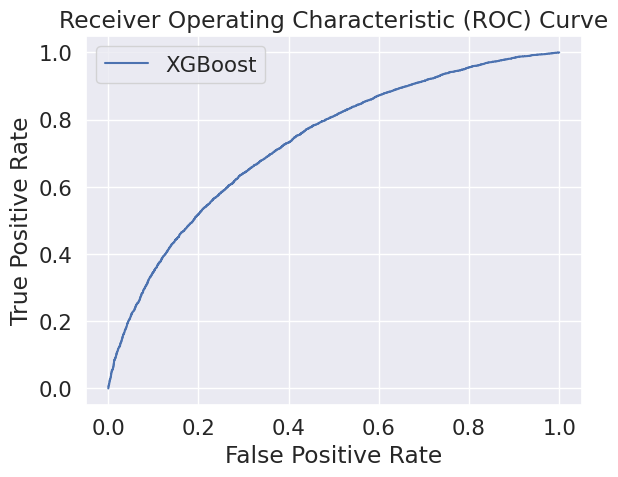

In [ ]:
#
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Train the XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=1000, max_depth=3, learning_rate=0.1)
xgb_model.fit(X_train, Y_train)

# Test the XGBoost model
xgb_pred = xgb_model.predict(X_test)

# Round the predicted values
xgb_prediction = list(map(round, xgb_pred))

# Confusion matrix
cm = confusion_matrix(Y_test, xgb_prediction)
cm = pd.DataFrame(cm)
print("Confusion Matrix:\n", cm)

# Accuracy score
test_accuracy = accuracy_score(Y_test, xgb_prediction)
print('Test Accuracy: ', test_accuracy*100, "%")

# Classification report
print(classification_report(Y_test, xgb_prediction))

# ROC Curve and AUC score
xgb_predicted_tree = xgb_model.predict_proba(X_test)[:,1]
xgb_auc_score = roc_auc_score(Y_test, xgb_predicted_tree)
print(f'AUC for XGBoost:\t{xgb_auc_score:.2f}')

xgb_fp_tree, xgb_tp_tree, xgb_thresh_tree = roc_curve(Y_test, xgb_predicted_tree)
plt.plot(xgb_fp_tree, xgb_tp_tree, 'b', label='XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


Naive Bayes Classifier


Confusion Matrix : 
       0     1
0  5245  3454
1  1860  4441
Test accuracy =  64.57333333333334 %
              precision    recall  f1-score   support

           0       0.74      0.60      0.66      8699
           1       0.56      0.70      0.63      6301

    accuracy                           0.65     15000
   macro avg       0.65      0.65      0.64     15000
weighted avg       0.66      0.65      0.65     15000

AUC for Naive Bayes:	0.7085373238270414


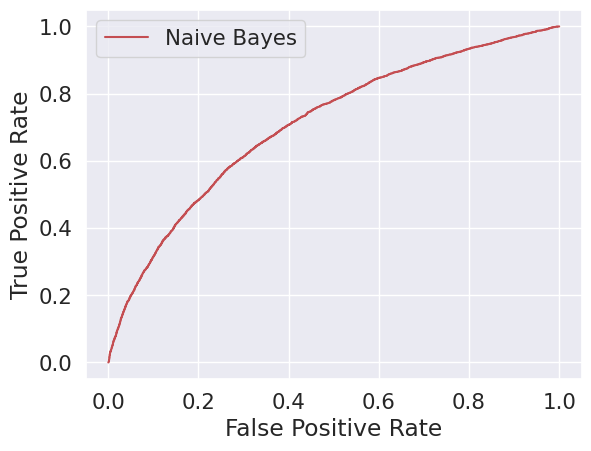

In [ ]:
#
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)
nb_pred = nb_model.predict(X_test)

cm = confusion_matrix(Y_test, nb_pred)
cm = pd.DataFrame(cm)
print("Confusion Matrix : \n", cm)
Test_accuracy = accuracy_score(Y_test, nb_pred)
print('Test accuracy = ', Test_accuracy*100,"%")

print(classification_report(Y_test, nb_pred))

predictedTree = nb_model.predict_proba(X_test)[:,1]

print(f'AUC for Naive Bayes:\t{roc_auc_score(Y_test, predictedTree)}')
fpnb, tpnb, threshnb = roc_curve(Y_test, predictedTree)

plt.plot(fpnb, tpnb, 'r', label='Naive Bayes')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


K-Nearest Neighbors (KNN) Classifier

Confusion Matrix : 
 [[6149 2550]
 [3014 3287]]
Accuracy: 0.6290666666666667
              precision    recall  f1-score   support

           0       0.67      0.71      0.69      8699
           1       0.56      0.52      0.54      6301

    accuracy                           0.63     15000
   macro avg       0.62      0.61      0.62     15000
weighted avg       0.63      0.63      0.63     15000

AUC for KNN:	0.6588152253653412


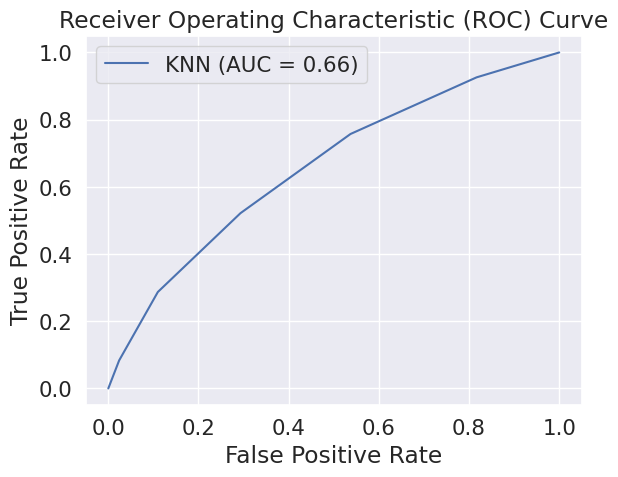

In [ ]:
#
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)

cm = confusion_matrix(Y_test, knn_pred)
print("Confusion Matrix : \n", cm)

accuracy = accuracy_score(Y_test, knn_pred)
print("Accuracy:", accuracy)

print(classification_report(Y_test, knn_pred))

predictedTree = knn.predict_proba(X_test)[:,1]

print(f'AUC for KNN:\t{roc_auc_score(Y_test, predictedTree)}')
fpr, tpr, thresholds = roc_curve(Y_test, predictedTree)
plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc_score(Y_test, predictedTree):.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
